# Spam Message Classification

### 1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.tsv',sep='\t')

In [6]:
df.tail(5)

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
print(df['label'].value_counts())
df['label'].value_counts() / len(df)

#86% data is ham, 13% data is spam

ham     4825
spam     747
Name: label, dtype: int64


ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [ ]:
#imbalance dataset > need to fix it

In [11]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [12]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [13]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [14]:
ham = ham.sample(spam.shape[0]) #balance the shape of ham to be same as spam

In [15]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [16]:
#merge the df 
data = ham.append(spam,ignore_index=True)

In [17]:
data.shape

(1494, 4)

In [18]:
#check the number of label for each cateogry
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

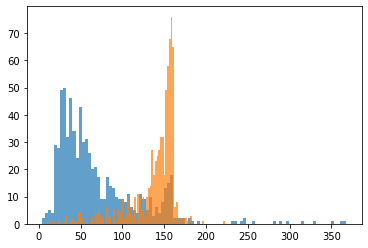

In [20]:
#initial analysis with visualization
#labelw with length

plt.hist(data[data['label'] == 'ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'],bins=100,alpha=0.7)
plt.show()

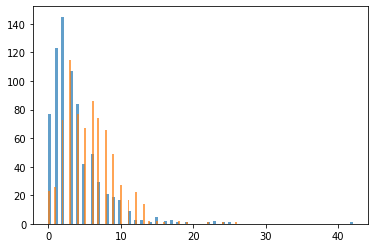

In [21]:
# do analysis for column 'punct'
# label with punct

plt.hist(data[data['label'] == 'ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label'] == 'spam']['punct'],bins=100,alpha=0.7)
plt.show()
#no much affect


In [22]:
data

,label,message,length,punct
0,ham,Hi mate its RV did u hav a nice hol just a mes...,129,1
1,ham,"Dear,regret i cudnt pick call.drove down frm c...",124,7
2,ham,They will pick up and drop in car.so no problem..,49,3
3,ham,Mode men or have you left.,26,1
4,ham,Take some small dose tablet for fever,37,0
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


#### split dataset to train and test

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
#30% data as test dataset

#y_ is output label
X_train, X_test,y_train,y_test =train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True) 

In [30]:
X_train.shape

(1045,)

In [31]:
X_test.shape

(449,)

In [33]:
y_train.shape

(1045,)

### 2) Building the Model (Random Forest)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [60]:
#pass as tuple
#define rf params

classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=10))])

In [61]:
# train the classifier
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

### 3）Predicting the results (Random Forest)

In [62]:
#define prediction model
y_pred = classifier.predict(X_test)

In [63]:
y_test,y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spa

In [42]:
# get accuracy of training model

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [64]:
accuracy_score(y_test,y_pred) # true label, predict labe;

0.9198218262806236

In [44]:
0.9198218262806236*449

413.0

In [45]:
# from the output, the accuracy is quite high, out of 449, we have 413 

In [46]:
confusion_matrix(y_test,y_pred)

array([[224,   3],
       [ 33, 189]], dtype=int64)

In [47]:
#TP, FN
#FP, TN

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93       227
        spam       0.98      0.85      0.91       222

    accuracy                           0.92       449
   macro avg       0.93      0.92      0.92       449
weighted avg       0.93      0.92      0.92       449



## Apply SVM

In [53]:
from sklearn.svm import SVC

svm = Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC(C=100,gamma='auto'))])

In [54]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [55]:
y_pred = svm.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [57]:
confusion_matrix(y_test,y_pred)

array([[226,   1],
       [ 23, 199]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## Testing the model with test data

In [59]:
# test 1, test2 are ham
# test 3 are test3

test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things!']
test3 = ['Congratulations, You won a lottery ticket with $1 Million ! To claim call on 44677']

In [66]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['ham']


In [67]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
